In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

# LAB 1 - Introduction to Python

## DUE: 1 SEPT 2017 @ 5pm

## NAME: Bane Sullivan                
## STUDENT NUMBER: 10687560

The purpose of this lab is to get you writing short code in Python - either in a IDE like Spyder or (preferrably) in a Jupyter Notebook file.  You will notice that there are a number of additional files in the directory that provide (I think) a very good introduction to Python including a number of worked examples.  I'd recommend finding/reading through the relevant sections before beginning any of the exercises!

**Note: You must show your analytical/numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook!**

## Part 1 - Introduction to Python Programming

(**Q1-1**) **Functions:** Write a short Python script that solves the [quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation) 

$$ x = \frac{-b \pm \sqrt{b^2-4ac}}{2a} \tag{1} $$

for a particular set of $a$, $b$ and $c$.  Note that it would be judicious to define and then call a **function** that requires the input of a set of $a$, $b$ and $c$ values.

In [2]:
## . . Your answer to question 1-1
def solveQuad(a,b,c):
    d = (b**2) - (4*a*c)
    numpos = -b + np.sqrt(d)
    numneg = -b - np.sqrt(d)
    den = 2*a
    return [numpos/den, numneg/den]


(**Q1-2**) **Slicing**: Define a string representing the phrase *'Digital Signal Processing'*.  Write the Python commands to:

(a) Extract and print out the word 'Signal'?

(b) Write every third character in the phrase?

(c) Sort and print out the phrase in alphabetical order?

In [139]:
## . . Your answer to question 1-2
course = 'Digital Signal Processing'
print(course[8:15])
print(course[::3])
print(''.join(sorted(course.lower())))

Signal 
DiliaPcsg
  aacdegggiiiillnnoprssst


(**Q1-3**) **Loops**: Write a short Python script to write out the value of $x^2$ for integers ranging from 0 to 20.  You should first define and then call a function.

In [1]:
## . . Your answer to question 1-3
# Note: range up to 21 because range(val) yields [0,val)
print([x**2 for x in range(21)])


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


(**Q1-4**) **Loop + If-else structure**: Extend your answer to question Q1-3 to write out $x^2$ only when $x$ is a prime number.  Otherwise, you should write out $x^3$.  (HINT: is there a python *isprime* command?)

In [14]:
## . . Your answer to question 1-4
def isprime(n):
    '''check if integer n is a prime'''
    # make sure n is a positive integer
    n = abs(int(n))
    # 0 and 1 are not primes
    if n < 2:
        return False
    # 2 is the only even prime number
    if n == 2: 
        return True    
    # all other even numbers are not primes
    if not n & 1: 
        return False
    # range starts with 3 and only needs to go up the squareroot of n
    # for all odd numbers
    for x in range(3, int(n**0.5)+1, 2):
        if n % x == 0:
            return False
    return True


print_me = [] # makes horizontal print out
for x in range(21): 
    if isprime(x):
        print_me.append(x**2)
        #print(x**2)
    else:
        print_me.append(x**3)
        #print(x**3)
print(print_me)


[0, 1, 4, 9, 64, 25, 216, 49, 512, 729, 1000, 121, 1728, 169, 2744, 3375, 4096, 289, 5832, 361, 8000]


## Part 2 - Numpy

**Q2-1**: **Arrays**: Write a Python coode that that constructs a 10x10 Numpy Array that has entries equal to the row times column number (e.g., the entry for row 2, column 3 would be 6).  Do not use manual entry and remember Python indexing starts at 0!

In [151]:
## . . You answer to question 2-1
#data = np.zeros((10,10), dtype=np.int)
dim = 10
matr = np.array([(i+1)*(j+1) for i in range(dim) for j in range(dim)], dtype=np.int)
matr = matr.reshape(10,10)

print(matr)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


**Q2-2**: **Array manipulation**: You have been given a data set for the temperature in Stockholm over roughly the past 200 years.  Redo this example but (1) convert the temperatures to Farenheit and (2) subtract off the mean temperature.  Generate a figure that illustrates the changes you have made.

In [134]:
#import matplotlib.pyplot as plt
## . . Your answer to question 2-2
data = np.genfromtxt('stockholm_td_adj.dat')

# Convert temperature to Farenheit:
temp = data[:,5]                     # in deg Cel
temp = temp * (9.0 / 5.0) + 32.0     # now in deg F

# Subtract off the mean temperature:
temp = temp - np.mean(temp)

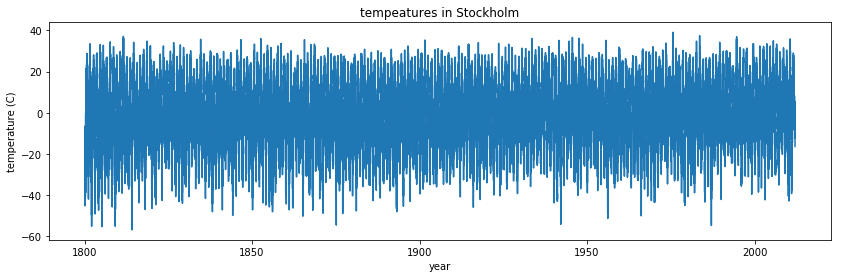

In [154]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, temp)
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');
plt.show()
fig.savefig("MyTemperaturePlot.png")

**Q2-3**: **Complex Numbers 1**: Find the amplitude and phase of 

$$z = \frac{-9+3i}{1-2i} \tag{2} $$

Write a short python script to validate your result.

In [73]:
## . . Your answer to question 2-3
# simplifies to (-3-3j): done on paper
magnitude = np.sqrt(18)
phase = np.arctan(1)
# add 90 deg (pi/2 radians) and make negative because in third quadrant and going clockwise
phase = phase + (np.pi/2.0)
phase *= -1

z = (-9.0 + 3.0j) / (1.0 - 2.0j)

# Will through assertion error if my numbers are wrong
assert np.allclose(np.abs(z), magnitude, atol=0.0001)
assert np.allclose(np.angle(z), phase, atol=0.0001)



**Q2-4**: **Complex Numbers 2**: Solve the following equation:

$$ iz^2-2\sqrt{2}z-2\sqrt{3}=0, \quad z\in\mathbb{C} $$

Write a short python script to validate your result.

In [92]:
## . . Your answer to question 2-4

# My paper answers:
sol1 = 1 - 3.146j
sol2 = -1 + .317j

# This is in the form: az**2 + bxz+ c = 0
# So lets use def solveQuad defined in Problem 1-1 (copy and pasted here)
def solveQuad(a,b,c):
    d = (b**2) - (4*a*c)
    numpos = -b + np.sqrt(d)
    numneg = -b - np.sqrt(d)
    den = 2*a
    return [numpos/den, numneg/den]

ans = solveQuad(1.0j, -2.0*np.sqrt(2), -2.0*np.sqrt(3))

# Will through assertion error if my paper answers are wrong:
assert np.allclose(ans[0], sol1, atol=0.01)
assert np.allclose(ans[1], sol2, atol=0.01)


**Q2-5: Complex Numbers 3:** Is the following function real, imaginary or contains both?

$$ \mathrm{e}^{2+i\pi/2} \tag{3}$$

Write a short python script to validate your result.

In [136]:
## . . Your answer to question 2-5
n = np.exp(2.0 + 1.0j*(np.pi/2.0))

# This a complex number so it contains real and imaginary parts
# assert both real and imag parts are not zero
assert n.real is not 0
assert n.imag is not 0

## Part 3 - Matplotlib

**Q3-1: 2D Plotting**: Recreate the following figure and save it under the name "MyTwoFunctions.png". 

<img src="TwoFunctions.png" width="500">


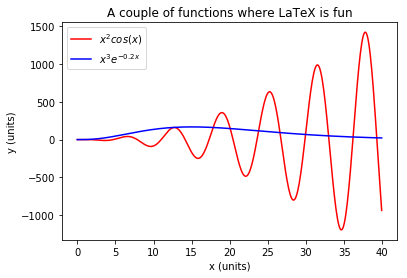

In [152]:
## . . Your answer to question 3-1
x = np.arange(0,40,0.1)
y1 = x**2 * np.cos(x)
y2 = x**3 * np.exp(-0.2*x)

plt.close('all')

fig, ax = plt.subplots()
ax.plot(x, y1, color='r', label='$x^2 cos(x)$')
ax.plot(x, y2, color='b', label='$x^3 e^{-0.2x}$')
ax.axis('tight')
ax.set_title('A couple of functions where LaTeX is fun')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
ax.legend(loc=2); # upper left corner

plt.show()

fig.savefig("MyTwoFunctions.png")

**Q3-2: Lissajous Figures (in Polar)** Lissajous curves are the family of curves described by the parametric equations
 
$$ \begin{eqnarray} 
x(t) &=& a \,\mathrm{sin}\,(nt +c)\\
y(t) &=& b \, \mathrm{sin}\,(t) \\
\end{eqnarray}
$$
 
The curves are named after Jules-Antonie Lissajous (1822-1880) who discovered the curves (in 1857) while doing experiments involving sound vibrations.  They are also sometimes referred to as Bowditch curves after the American mathematician Nathaniel Bowditch(1773-1838).  He is said to have discovered the curves while studying pendulums in 1815.  These curves have applications in physics, astronomy, mathematics and other sciences.

Write a python script to make a **polar plot** of a Lissajous figure between $t=[0,2\pi]$ using the following parameters: $a=4$, $b=3$, $n=4/3$ and $c=\pi/30$. It should look something like this:

<img src="Lissajous.png" width="500">


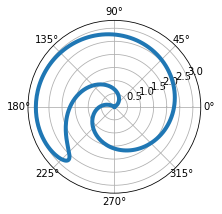

In [153]:
## . . Your answer to question 3-2 here.
t = np.arange(0, 2.0*np.pi, 0.01)
a = 4.0
b = 3.0
n = 4.0 / 3.0
c = np.pi / 30.0

x = a * np.sin(n*t + c)
y = b * np.sin(t)

# Four polar axes
#f, ax = plt.subplots(subplot_kw=dict(projection='polar'))
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
ax.plot(x, y, linewidth=4.0)

plt.show()
fig.savefig("MyPolarPlot.png")